# **Setup**

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
plt.style.use('fast')

import shap

In [2]:
Folder_Input = 'Input Data'

# **Data Import**

* https://archive.ics.uci.edu/dataset/1/abalone

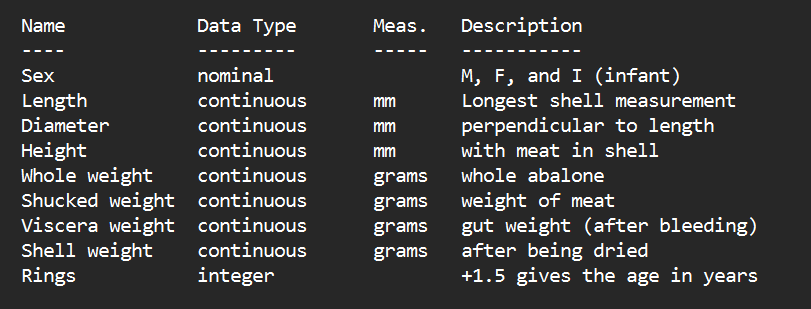

In [3]:
df = pd.read_csv(f'{Folder_Input}/abalone.data',header=None,
                 names=['Sex','Length','Diameter','Height','Whole_Weight','Shucked_Weight',
                        'Viscera_Weight','Shell_Weight','Rings'])

print(df.shape)
df.sample(10)

(4177, 9)


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
3370,M,0.455,0.345,0.125,0.4400,0.1690,0.1065,0.1350,12
287,F,0.495,0.400,0.155,0.6445,0.2420,0.1325,0.2050,17
2439,F,0.345,0.255,0.100,0.1970,0.0710,0.0510,0.0600,9
2153,I,0.280,0.200,0.075,0.1225,0.0545,0.0115,0.0350,5
2731,I,0.410,0.315,0.100,0.3000,0.1240,0.0575,0.1000,8
3693,M,0.650,0.495,0.170,1.2760,0.6215,0.2305,0.3990,11
1699,I,0.635,0.500,0.165,1.4890,0.7150,0.3445,0.3615,13
644,M,0.450,0.340,0.130,0.3715,0.1605,0.0795,0.1050,9
1918,F,0.600,0.465,0.160,1.1330,0.4660,0.2885,0.2980,11
3265,M,0.480,0.380,0.135,0.5280,0.2000,0.1395,0.1600,14


# **Data Validation**

In [4]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_Weight      0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Rings             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_Weight    4177 non-null   float64
 5   Shucked_Weight  4177 non-null   float64
 6   Viscera_Weight  4177 non-null   float64
 7   Shell_Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# **Data Exploration**

## **Scatterplot & Boxplot**

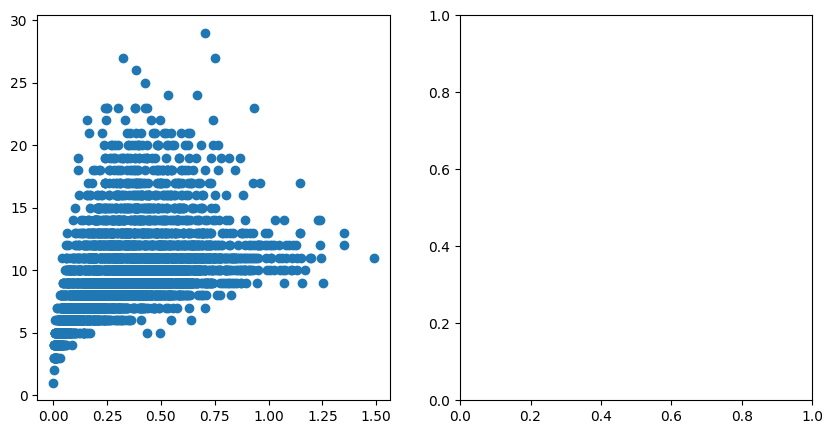

In [7]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].scatter(x=df['Shucked_Weight'],y=df['Rings'])
# axs[1].boxplot(x=df['Sex'])
plt.show()

## **Correlation Heatmap**

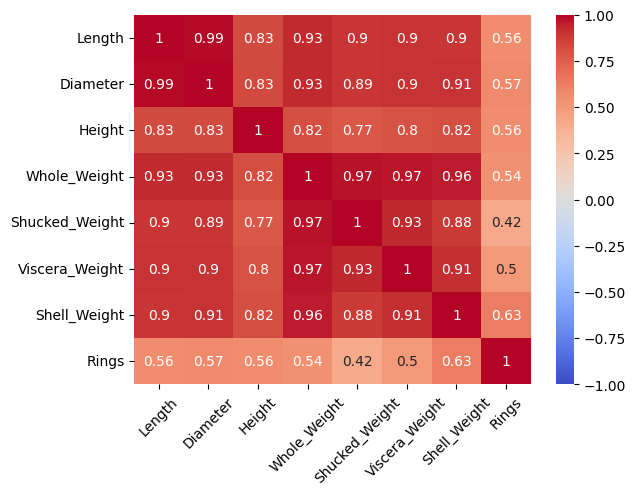

In [8]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.xticks(rotation=45)
plt.show()

# **Data Split**

In [9]:
X = df.drop(['Whole_Weight','Diameter','Rings'],axis=1)
y = df['Rings']

display(X.head())
display(y.head())

,Sex,Length,Height,Shucked_Weight,Viscera_Weight,Shell_Weight
0,M,0.455,0.095,0.2245,0.1010,0.150
1,M,0.350,0.090,0.0995,0.0485,0.070
2,F,0.530,0.135,0.2565,0.1415,0.210
3,M,0.440,0.125,0.2155,0.1140,0.155
4,I,0.330,0.080,0.0895,0.0395,0.055


0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [10]:
# Encode Sex Column
X = pd.get_dummies(X, drop_first=False).astype(float)
X.loc[:,['Sex_F','Sex_I','Sex_M']] = X.loc[:,['Sex_F','Sex_I','Sex_M']].astype(int)
X.sample(10)

,Length,Height,Shucked_Weight,Viscera_Weight,Shell_Weight,Sex_F,Sex_I,Sex_M
1449,0.450,0.125,0.2165,0.1260,0.1100,0.0,0.0,1.0
2294,0.525,0.120,0.3335,0.1465,0.2200,0.0,0.0,1.0
3699,0.650,0.190,0.5975,0.2960,0.4000,0.0,0.0,1.0
1423,0.725,0.200,0.6970,0.3585,0.5950,1.0,0.0,0.0
227,0.365,0.085,0.0780,0.0485,0.0700,0.0,1.0,0.0
1437,0.400,0.110,0.1880,0.0455,0.0825,0.0,1.0,0.0
526,0.155,0.040,0.0065,0.0030,0.0050,0.0,0.0,1.0
1490,0.605,0.160,0.4170,0.2875,0.3800,1.0,0.0,0.0
2551,0.295,0.070,0.0515,0.0275,0.0350,0.0,1.0,0.0
3325,0.345,0.090,0.0615,0.0370,0.0485,0.0,0.0,1.0


# **Model 01 - Regression**

In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import shap
shap.initjs()

In [12]:
model01 = xgb.XGBRegressor(objective='reg:squarederror')
model01.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
model01.predict_proba(X[0])

AttributeError: 'XGBRegressor' object has no attribute 'predict_proba'

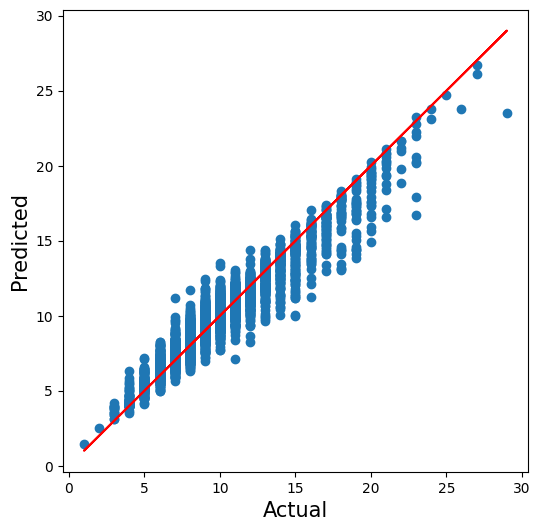

In [13]:
y_pred = model01.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(y,y_pred)
plt.plot(y,y,color='red')

plt.xlabel('Actual',size=15)
plt.ylabel('Predicted',size=15)
plt.show()

## **Get Shap Values**

In [14]:
model01_explainer = shap.Explainer(model01)
model01_shap_values = model01_explainer(X)

print(model01_shap_values.shape)    # One Shape Value For Each Observation

(4177, 8)


## **Waterfall Plot**

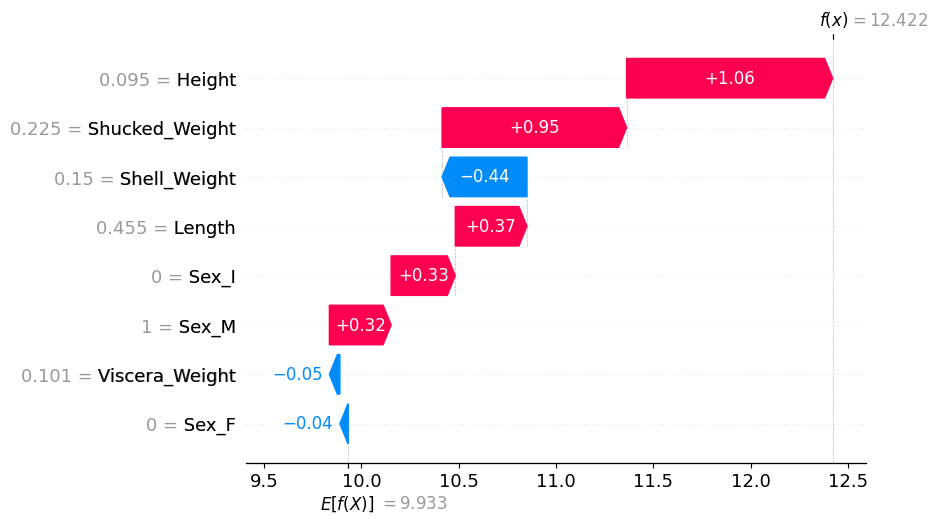

In [15]:
# Explanation For First Observation
shap.plots.waterfall(model01_shap_values[0]) 

## **Force Plot**

In [16]:
shap.plots.force(model01_shap_values[0])

In [17]:
# Stacked Force Plot
shap.plots.force(model01_shap_values[0:100])

## **Mean SHAP**

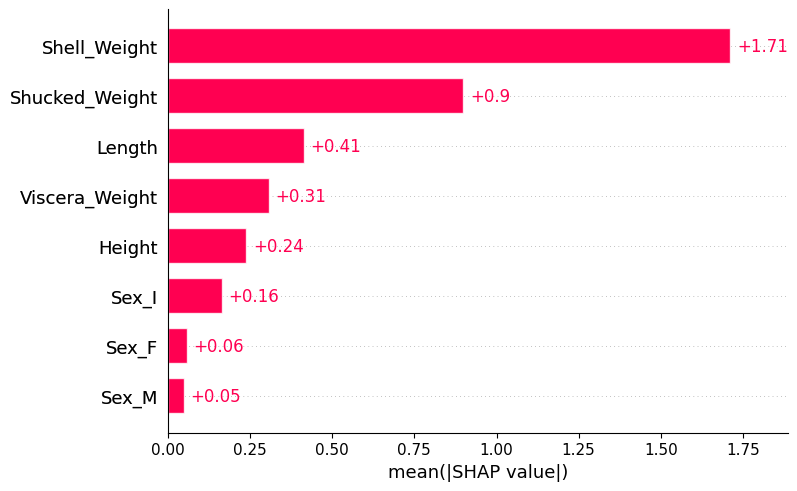

In [18]:
shap.plots.bar(model01_shap_values)

## **BeeSwarm Plot**

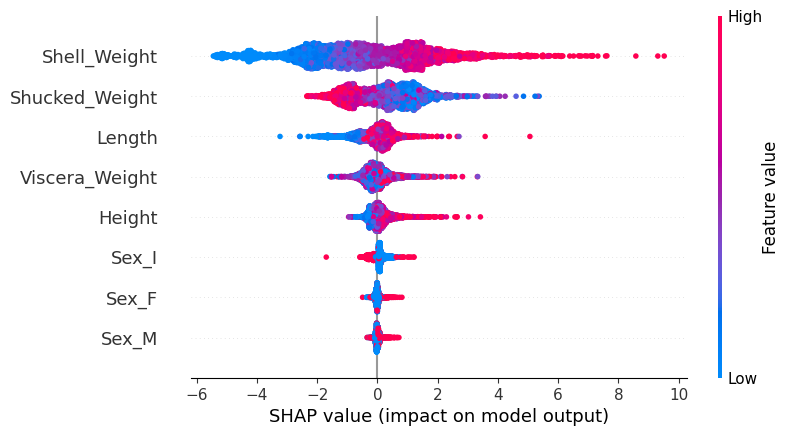

In [19]:
# Beeswarm plot
shap.plots.beeswarm(model01_shap_values)

## **Dependence Plot**

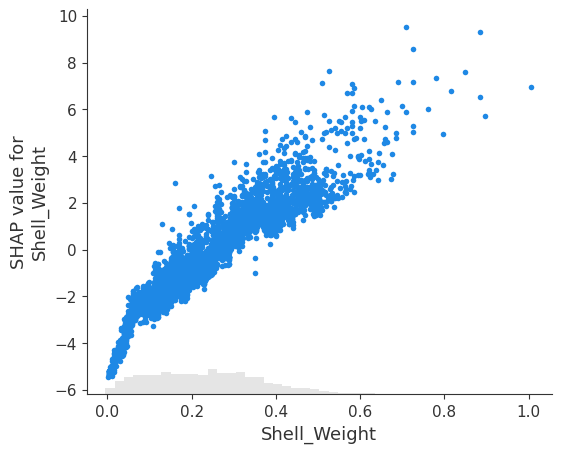

In [20]:
shap.plots.scatter(model01_shap_values[:,'Shell_Weight'])

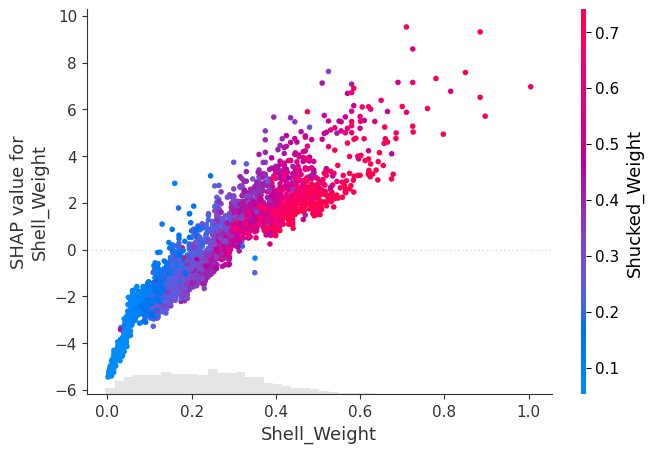

In [21]:
shap.plots.scatter(model01_shap_values[:,'Shell_Weight'],
                   color=model01_shap_values[:,'Shucked_Weight'])

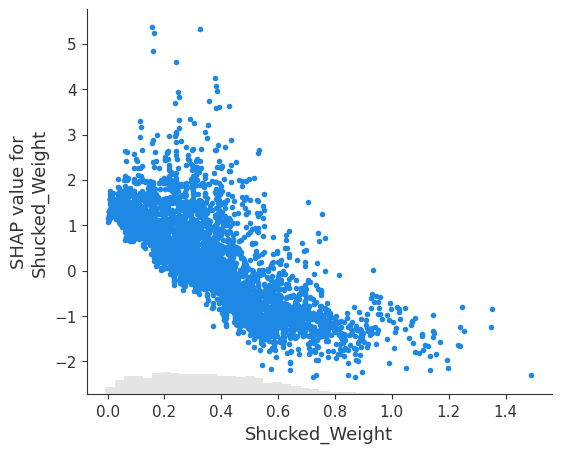

In [22]:
shap.plots.scatter(model01_shap_values[:,'Shucked_Weight'])

# **Model 02 - Binary Classification**

* https://towardsdatascience.com/shap-for-binary-and-multiclass-target-variables-ff2f43de0cf4
* https://www.youtube.com/watch?v=2xlgOu22YgE

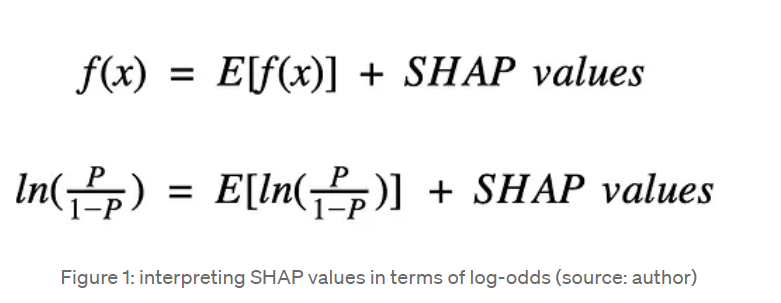

In [23]:
df.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
int(round(df['Rings'].mean(),0))

10

In [34]:
# Binary Classification Target Column 
# 1 = Observation Has Above Average No. Of Rings
# 0 = Observation Has Below Average No. Of Rings

y_bin = [1 if y >= df['Rings'].mean() else 0 for y in y]

from statistics import mean
# print(mean(y_bin))

print(np.mean(y_bin))
print(y_bin[:20])

0.4982044529566675
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]


In [26]:
model02 = xgb.XGBClassifier(objective='binary:logistic')
model02.fit(X,y_bin)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_bin_pred = model02.predict(X)

print(y_bin_pred)

[0 0 0 ... 0 1 1]


## **Get Shap Values**

In [27]:
model02_explainer = shap.Explainer(model02)
model02_shap_values = model02_explainer(X)

print(model02_shap_values.shape)    # One Shape Value For Each Observation

(4177, 8)


## **Waterfall Plot**

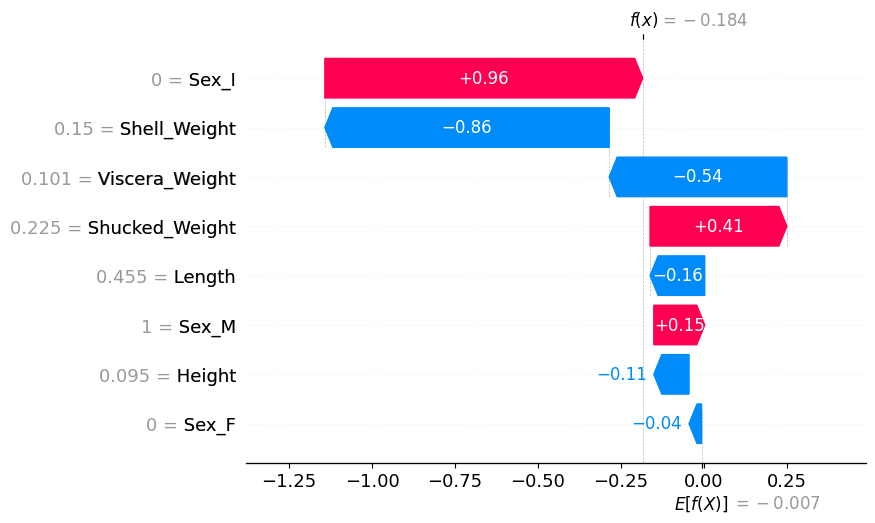

In [28]:
# waterfall plot for first instance
shap.plots.waterfall(model02_shap_values[0])

# **Model 03 - Multiclass Classification**

In [39]:
# Binary Classification Target Column 
# 0 = Young Age
# 1 = Medium Age
# 2 = Old Age

y_cat = [2 if y >= 12 else 1 if y>=8 else 0 for y in y]

print(np.mean(y_cat))
print(y_cat[:20])

1.0289681589657649
[2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1]


In [46]:
model03 = xgb.XGBClassifier(objective='multi:softprob')
model03.fit(X,y_cat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
# get probability predictions
model03.predict_proba(X)[0]

array([0.07026892, 0.55338377, 0.37634736], dtype=float32)

## **Get SHAP Values**

In [48]:
model03_explainer = shap.Explainer(model03)
model03_shap_values = model03_explainer(X)

print(model03_shap_values.shape)    # One Shape Value For Each Observation

(4177, 8, 3)


## **Waterfall Plot**

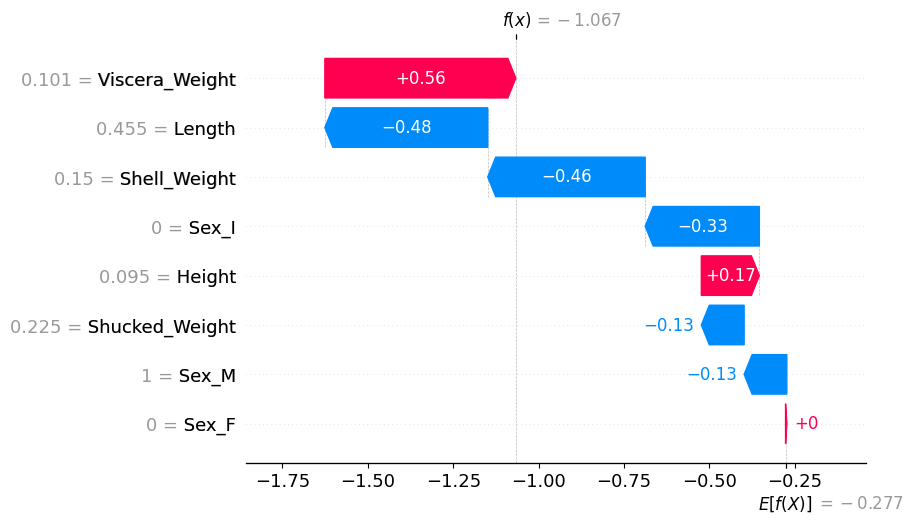

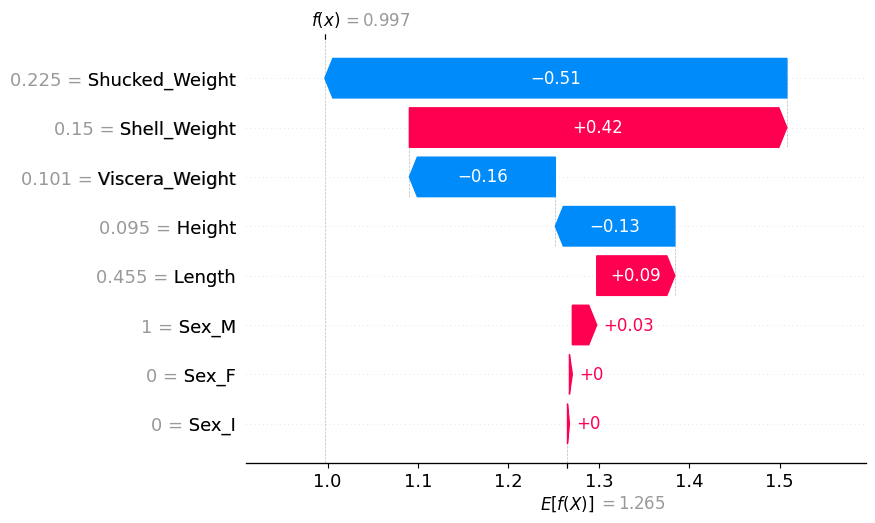

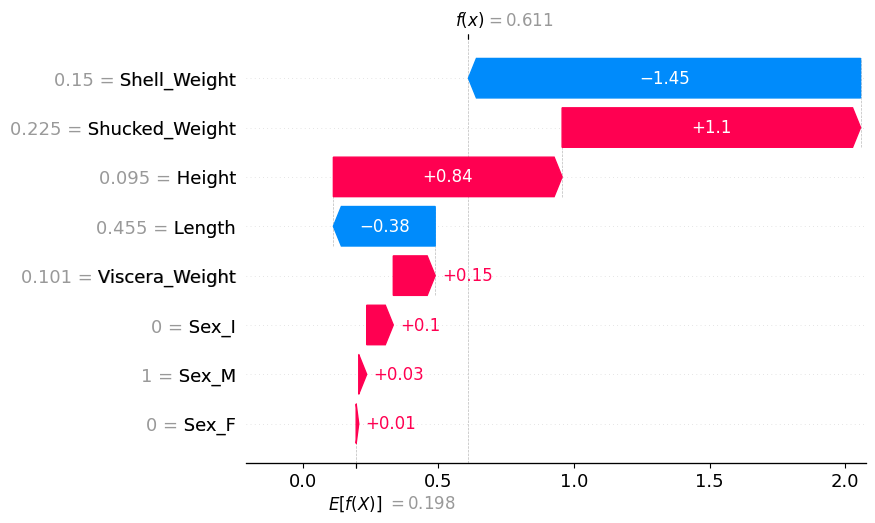

In [49]:
# waterfall plot for class 0
shap.plots.waterfall(model03_shap_values[0,:,0])

# waterfall plot for class 1
shap.plots.waterfall(model03_shap_values[0,:,1])

# waterfall plot for class 2
shap.plots.waterfall(model03_shap_values[0,:,2])

## **SoftMax Values**

In [50]:
def softmax(x):
    """Compute softmax values for each sets of scores in x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [58]:
# get probability predictions
model03.predict_proba(X)[0]

array([0.07026892, 0.55338377, 0.37634736], dtype=float32)

In [60]:
# convert softmax to probability
y_cat_predicted_prob = model03.predict_proba(X)[0]
print(y_cat_predicted_prob)

softmax(y_cat_predicted_prob)

[0.07026892 0.55338377 0.37634736]


array([0.25130647, 0.407397  , 0.34129652], dtype=float32)

## **Aggregating Multi-Class SHAP Values**

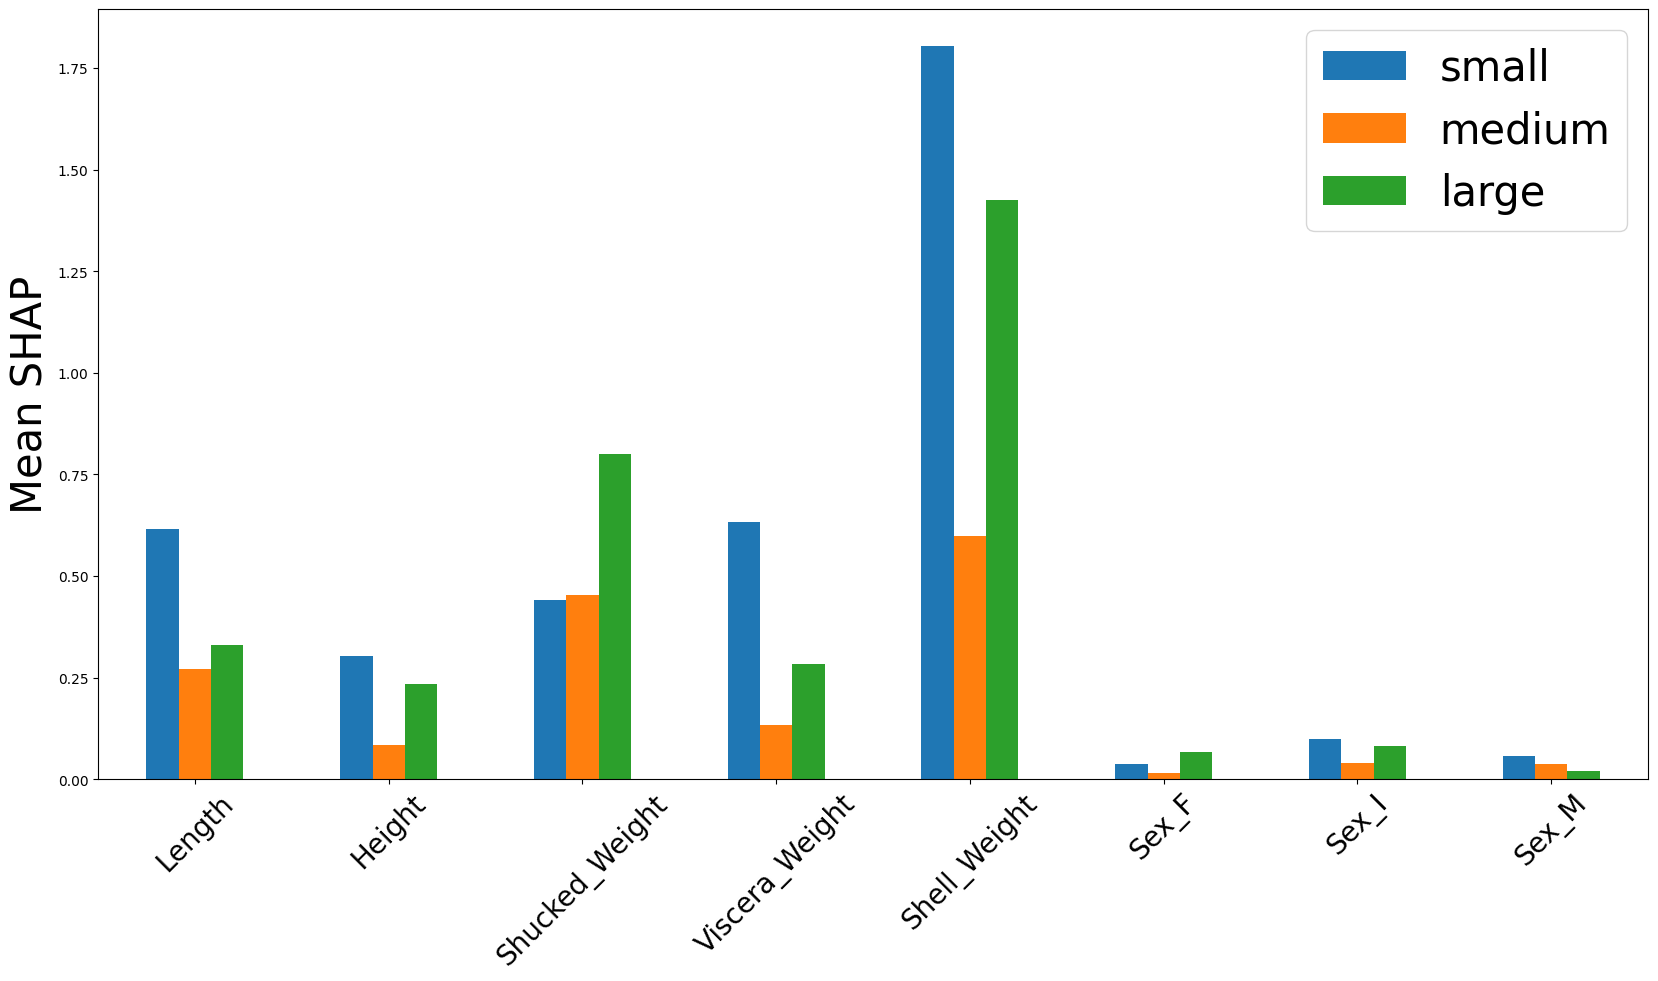

In [62]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(model03_shap_values.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(model03_shap_values.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(model03_shap_values.values[:,:,2]),axis=0)

df_cat_SHAP = pd.DataFrame({'small':mean_0,'medium':mean_1,'large':mean_2})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(20,10))
df_cat_SHAP.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP',size = 30)
ax.set_xticklabels(X.columns,rotation=45,size=20)
ax.legend(fontsize=30)
plt.show()